# Statistics Refresher

## Python version

This is a Jupyter notebook. It runs Python code and displays its output. 

This particular notebook is designed as a review of basic statistical concepts and how they can be calculated using Python. There are two parts to this overview, the Numerical Measures and the Probability Distributions. The first section will start with relatively simple stuff and build up to Variance and Correlation. Admittedly, I might need to add some more explanatory text. Or better, move it into Confluence... Hmm... there's a thought.

The second section shows some nice charts and graphs of the various basic probability distributions. I should probably add an introductory section that defines what a probability distribution is. There's another thought...

Lastly, the sections are all hyperlinked, so feel free to hop around. I've added "back to top" links all over the place.

## Table of contents <a class="anchor" id="top"></a>

### [Numerical Measures](#numerical-measures)

From [R numerical measures](http://www.r-tutor.com/elementary-statistics/numerical-measures).

- [Mean and median](#mean-and-median)
- [Quartile/Percentile](#quartile-percentile)
- [Range](#range)
- [Interquartile range](#interquartile-range)
- [Variance](#variance)
- [Standard deviation](#standard-deviation)
- [Covariance](#covariance)
- [Correlation coefficient](#correlation-coefficient)

### [Probability Distributions](#probability-distributions)

From [R probability distributions](http://www.r-tutor.com/elementary-statistics/probability-distributions)

- [Binomial distribution](#binomial-dist)
- [Continuous uniform distribution](#continuous-uniform-dist)
- [Normal distribution](#normal-dist)
- [Chi-squared distribution](#chi-squared-dist)
- [Poisson distribution](#poisson-dist)
- [Exponential distribution](#exponential-dist)

# Numerical measures <a class="anchor" id="numerical-measures"></a>

[back to top](#top)

## Our list in Python

In [1]:
import numpy as np

my_list = [3, 6, 12, 17, 32, 49, 50, 90]

print('My list of numbers: ', my_list)

My list of numbers:  [3, 6, 12, 17, 32, 49, 50, 90]


We can take a look at what variables are available in the Jupyter environment. This includes all `code` cells. Variables cannot be used in markdown cells unfortunately.

In [2]:
whos

Variable   Type      Data/Info
------------------------------
my_list    list      n=8
np         module    <module 'numpy' from 'C:\<...>ges\\numpy\\__init__.py'>


## Mean and median <a class="anchor" id="mean-and-median"></a>

[back to top](#top)

In [3]:
# The Pythonic way is to do only one thing per line
# This:
#
# a = np.some_calculation(arg)
# print("hello: ", a)
#
# is more readable than this:
#
# print("hello: ", np.some_calculation(arg))
#

print(my_list)

m = np.mean(my_list)
d = np.median(my_list)

print(f'Mean: {m}')
print('Median: ', d)

[3, 6, 12, 17, 32, 49, 50, 90]
Mean: 32.375
Median:  24.5


## Quartiles and percentiles <a class="anchor" id="quartile-percentile"></a>

[back to top](#top)

In [4]:
# If you need to calculate the same thing manytimes, use a loop:

print(my_list)

percentiles = [25, 50, 75, 3, 9, 90, 99]

for i in percentiles:
    p = np.percentile(my_list, i)
    print(f'{i}th percentile: {p}')

[3, 6, 12, 17, 32, 49, 50, 90]
25th percentile: 10.5
50th percentile: 24.5
75th percentile: 49.25
3th percentile: 3.63
9th percentile: 4.890000000000001
90th percentile: 61.99999999999999
99th percentile: 87.19999999999999


## Range <a class="anchor" id="range"></a>

[back to top](#top)

In [5]:
# In Python the keyword 'range' is already taken
# so instead, numpy names it 'peak to peak'

print(my_list)

r = np.ptp(my_list)
print('Range: ', r)

[3, 6, 12, 17, 32, 49, 50, 90]
Range:  87


## Interquartile Range <a class="anchor" id="interquartile-range"></a>

[back to top](#top)

In [6]:
print(my_list)

# Numpy doesn't have a dedicated function for IQR
q25, q75 = np.percentile(my_list, [25, 75])
iqr = q75 - q25

print('IQR: ', iqr)

[3, 6, 12, 17, 32, 49, 50, 90]
IQR:  38.75


## Variance <a class="anchor" id="variance"></a>

[back to top](#top)

The **variance** is a numerical measure of how the data values are dispersed around the mean. The sample mean and variance are $\bar{x}$ and $s^2$, respectively. The population mean and variance are $\mu$ and $\sigma^2$.

To calculate the variance, you take each value and subtract the mean from it, then square the result. Once you have added all the squares divide that total by the number of observations. Actually, just one less than the total number of observations. It looks like this. Where $n$ is the total number of observations.

$$s^2 = \frac{(x_1 - \bar{x})^2 + (x_2 - \bar{x})^2 +\;...\,+ (x_n - \bar{x})^2}{n-1}$$

The fancy mathematical way to write it is like this.

$$s^2=\frac{1}{n-1}\sum_{i=1}^n (x_{i}-\bar{x})^2 \qquad \text{or} \qquad \sigma^2=\frac{1}{n-1}\sum_{i=1}^n (x_{i}-\mu)^2$$

In [7]:
print(my_list)

# Numpy defaults to 0 degrees of freedom
variance = np.var(my_list, ddof=1)

print(f'Variance: {variance}')

[3, 6, 12, 17, 32, 49, 50, 90]
Variance: 873.9821428571429


## Standard deviation <a class="anchor" id="standard-deviation"></a>

[back to top](#top)

The **standard deviation** of an observation variable is the square root of its variance.

Sample $\sqrt{s^2}$.

Population $\sqrt{\sigma^2}$.

In [8]:
print(my_list)

std = np.std(my_list, ddof=1)

print(f'Std dev: {std}')

[3, 6, 12, 17, 32, 49, 50, 90]
Std dev: 29.5631889832126


## Covariance <a class="anchor" id="covariance"></a>

[back to top](#top)

The **covariance** ($s_{xy}$ or $\sigma_{xy}$) of two variables *x* and *y* in a data set measures how the two are linearly related. A positive covariance would indicate a positive linear relationship between the variables, and a negative covariance would indicate the opposite.

To calculate the covariance you take the error in each observation of both sets and multiply with its corresponding error in the other variable. Then you add all the products. Then you divide by one less than the total number of observations.

$$s_{xy} = \frac{(x_1 - \bar{x})(y_1 - \bar{y}) + (x_2 - \bar{x})(y_2 - \bar{y})\;+\;...\,+\;(x_n - \bar{x})(y_n - \bar{y})}{n-1}$$

In fancy math notation this looks like so

$$s_{xy}= \frac{1}{n-1}\sum_{i=1}^n(x_i - \bar{x})(y_i - \bar{y}) \qquad or \qquad \sigma_{xy}= \frac{1}{n-1}\sum_{i=1}^n(x_i - \mu_x)(y_i - \mu_y)$$

The `cov` function provided in numpy outputs a covariance matrix. In this case the covariance appears in the top right and bottom left.

In [9]:
my_second_list = [20, 31, 33, 34, 35, 37, 41, 49]

print(my_list)
print(my_second_list)

covar = np.cov(my_list, my_second_list, ddof=1)

print(f'Covariance:\n{covar}')

[3, 6, 12, 17, 32, 49, 50, 90]
[20, 31, 33, 34, 35, 37, 41, 49]
Covariance:
[[ 873.98214286  221.14285714]
 [ 221.14285714   68.85714286]]


## Correlation coefficient <a class="anchor" id="correlation-coefficient"></a>

[back to top](#top)

The **correlation coefficient** of two variables in a data set is equal to their covariance divided by the product of their individual standard deviations. It is a normalized measurement of how the two are linearly related.

$$r_{xy} = \frac{s_{xy}}{s_xs_y} \qquad or \qquad \rho_{xy} = \frac{\sigma_{xy}}{\sigma_x\sigma_y}$$

That's a lowercase rho by the way. In the below example, numpy returns a matrix. The reason is that the function is designed to return correlation of multiple data sets. The case of just two is a special case and does not justify changing the ouput type from matrix to integer.

In [10]:
print(my_list, '\n')
print(my_second_list, '\n')

r = np.corrcoef(my_list, my_second_list)

print(f'Correlation coeficient:\n{r}')

[3, 6, 12, 17, 32, 49, 50, 90] 

[20, 31, 33, 34, 35, 37, 41, 49] 

Correlation coeficient:
[[ 1.         0.9014614]
 [ 0.9014614  1.       ]]


# Probability distributions <a class="anchor" id="probability-distributions"></a>

[back to top](#top)

Numpy has functions to generate random data with [these](https://docs.scipy.org/doc/numpy-1.13.0/reference/routines.random.html) probability distributions.

In [11]:
# Some style stuff for the plots

from matplotlib import pyplot as plt
from scipy import stats
import matplotlib.style as mplstyle
%matplotlib inline
mplstyle.use('ggplot')

## Binomial distribution <a class="anchor" id="binomial-dist"></a>

[back to top](#top)

The **binomial distribution** describes the outcome of *n* independent trials in an experiment. Each trial is assumed to have only two outcomes, either success or failure.

$$f(x) =
    \begin{pmatrix}
    n \\
    x \\
    \end{pmatrix}
    p^x (1-p)^{n-x} \qquad \text{where}\; x = 0, 1, 2, ... , n
$$

In actual English, this is the distribution you get when you flip a coin. Or when you take a multiple choice test. If there are five choices, success at random will have

$P(\text{correct}) = .2$

Therefore

$P(\text{wrong}) = 1-.2 = .8$.

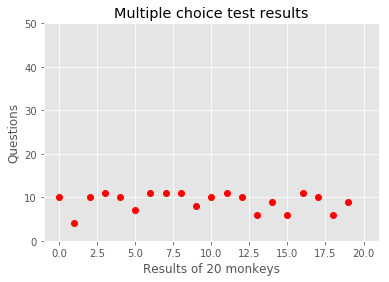

In [12]:
# Have a monkey take a multiple choice test with fifty questions.
# There are five choices per question.
# Get the results of twenty monkeys.

n = 50  # fifty questions
p = .2  # five choices
m = 20  # twenty monkeys

monkeys = np.random.binomial(n, p, m)

monkeys
x = np.arange(0,20,1)  # for the x axis


plt.plot(x, monkeys, 'ro')
plt.axis([-1,21,0,50])
plt.ylabel('Questions')
plt.xlabel('Results of 20 monkeys')
plt.title('Multiple choice test results')

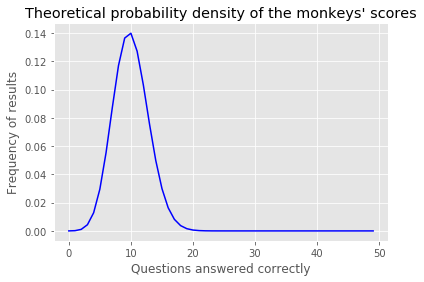

In [13]:
n = 50
p = .2

x = np.arange(0, 50)  # For the x axis
dist = stats.binom.pmf(x, n, p)  # Probability mass function, aka the maths

plt.plot(x, dist, color='b')
plt.title('Theoretical probability density of the monkeys\' scores')
plt.ylabel('Frequency of results')
plt.xlabel('Questions answered correctly')

## Continuous uniform distribution <a class="anchor" id="continuous-uniform-dist"></a>

[back to top](#top)

The **continuous uniform distribution** is the probability distribution of random number selection from the continuous interval between *a* and *b*.

$$
f(x) = \begin{cases}
    1\;/\;(b-a) & \text{when}\; a\le x \le b \\
    0 & \text{when}\; x\lt a \; \text{or}\; x \gt b \\
    \end{cases}
$$

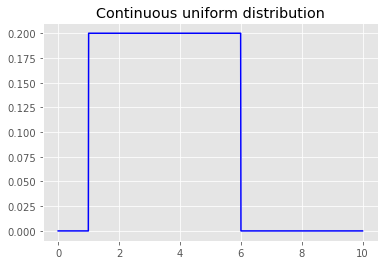

In [14]:
w = 5  # width
mu = 3.5  # center
x = np.linspace(0, 10, 1000)  # x axis

left = mu - 0.5 * w
dist = stats.uniform(left, w)

plt.plot(x, dist.pdf(x), color='b')
plt.title('Continuous uniform distribution')

## Normal distribution <a class="anchor" id="normal-dist"></a>

[back to top](#top)

The **normal distribution** is defined by the following probability density function, where $\mu$ is the population mean and $\sigma^2$ is the variance.

$$
f(x) = \frac{1}{\sigma\sqrt{2\pi}} e ^ {-\;(x\;-\;\mu)^2 / \; 2\sigma^2}
$$

If a random variable x follows the normal distribution, then we write

$$ X \sim N(\mu, \;\sigma^2) $$

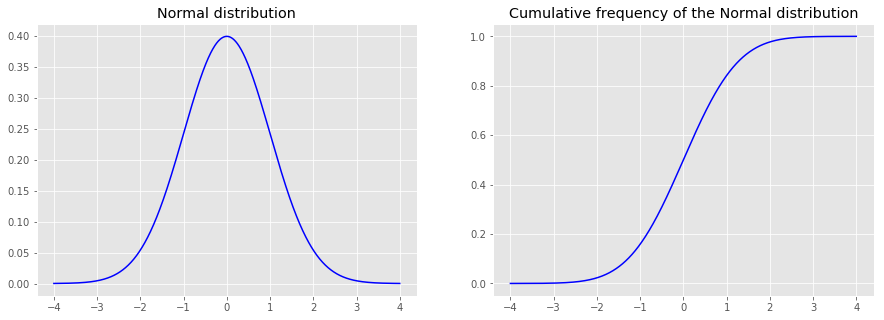

In [15]:
x = np.linspace(-4, 4, 1000)
dist = stats.norm()

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

ax1.plot(x, dist.pdf(x), color='b')
ax1.set_title('Normal distribution')

ax2.plot(x, dist.cdf(x), color='b')
ax2.set_title('Cumulative frequency of the Normal distribution')

## Chi-squared distribution <a class="anchor" id="chi-squared-dist"></a>

[back to top](#top)

This will be useful to know if we ever run a chi-square test.

You may sometimes catch yourself in a situation where you have many related variables that are each normally distributed. If that is the case, a useful thing to know is that you can aggregate their distributions. For example let's call each variable $Z_1, \, ... \, Z_k$.

If $Z_1, \, ... \, Z_k$ are independent, standard normal random variables, then the sum of their squares,

$$
Q = Z_1^2 + Z_2^2 + Z_3^2 + \; ... \; + Z_k^2
$$

is distributed according to the **chi-squared distribution** with *k* degrees of freedom. This is usually denoted using a Greek letter chi

$$
Q \sim \chi^2(k) \quad \text{or} \quad Q \sim \chi_k^2
$$

We can also write this in fancy math terms

$$
Q = \sum_{i=1}^k \; \chi_i^2\
$$

With the chi-squared distribution it is important to keep in mind the degrees of freedom. As a rule of thumb when starting out, just subtract one from the total number of variables you have. For example. If you want the chi-square distribution of the numbers on a six sided die, your degrees of freedom are 5.

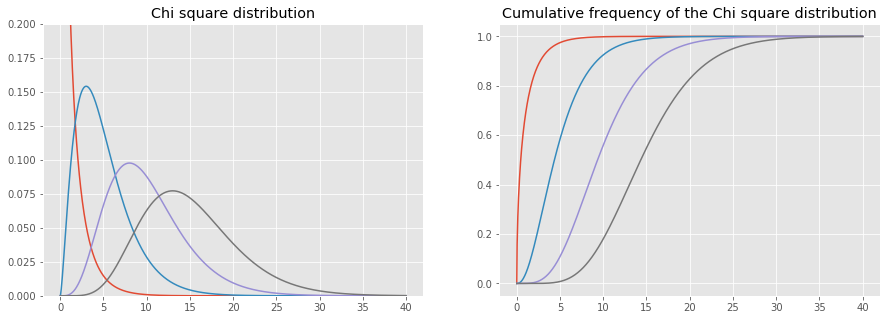

In [16]:
# Chi square distribution with various degrees of freedom

x = np.linspace(0, 40, 1000)

dfs = [1, 5, 10, 15]

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

for i in dfs:
    dist = stats.chi2(i)

    ax1.set_ylim([0,0.2])
    ax1.plot(x, dist.pdf(x))
    ax1.set_title('Chi square distribution')

    ax2.plot(x, dist.cdf(x))
    ax2.set_title('Cumulative frequency of the Chi square distribution')

## Poisson distribution <a class="anchor" id="poisson-dist"></a>

[back to top](#top)

The **poisson distribution** is the probability distribution of independent event occurrences in an interval. If you have an avearge number of occurences in an interval ($\lambda$), then the probability of having $x$ occurrences within a given interval is:

$$
f(x) = 
\frac{\lambda^x e^{-\lambda}}{x!} \qquad \text{where}\; x = 0, 1, 2, 3, ...
$$

In actual English, if an average of 10 cars cross a bridge every minute, the Poisson distribution describes the distribution of said car crossings. At higher values for $\lambda$ the distribution will be farther and farther to the right. Below are the theoretical values for lambda at 5, 10 and 15.

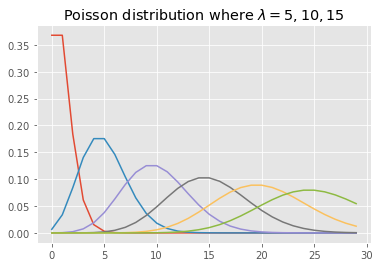

In [17]:
lam = [1, 5, 10, 15, 20, 25]  # Three lambda values
x = np.arange(0, 30)  # For the x axis

for i in lam:
    dist = stats.poisson(i)
    plt.plot(x, dist.pmf(x))  # probability mass function
    plt.title('Poisson distribution where $\lambda = 5, 10, 15$')

#### Example

A pirate ship observes an average of five mutiny attempts every looting season. In a typical year there are two looting seasons, the Spring and the Fall. In a century how many mutiny attempts will there be?

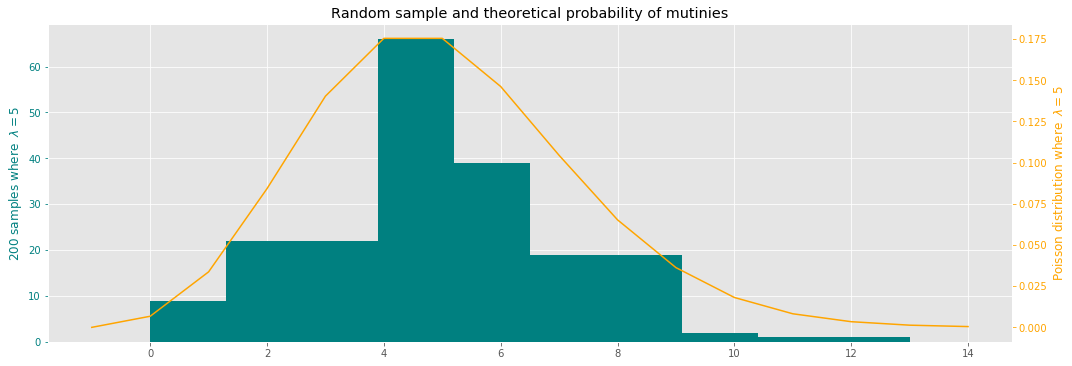

In [18]:
s = 5  # Average number of mutiny attempts
g = 200  # Looting seasons in a century
mutinies = np.random.poisson(s, g)  # A random sample from a Poisson distribution
s1 = stats.poisson(5)  # Probability density of the Poisson distribution (from scipy.stats)


# Plotting stuff below
fig, ax1 = plt.subplots(figsize=(15, 5))
ax1.hist(mutinies, color='teal')  # Our sample/simulation
ax1.set_ylabel(f'{g} samples where $\; \lambda = {s}$', color='teal')
ax1.tick_params('y', colors='teal')

ax2 = ax1.twinx()
x = np.arange(-1, 15)
ax2.plot(x, s1.pmf(x), 'b-', color='orange')
ax2.set_ylabel(f'Poisson distribution where $\; \lambda = {s}$', color='orange')
ax2.tick_params('y', colors='orange')
ax2.grid(False)

fig.tight_layout()
plt.title('Random sample and theoretical probability of mutinies')
plt.show()

[This](http://www.astroml.org/book_figures/chapter3/fig_poisson_distribution.html) site really helped figure out the code for the theoretical density curve.

## Exponential distribution <a class="anchor" id="exponential-dist"></a>

[back to top](#top)

The **exponential distribution** describes the arrival time of a randomly recurring independent event sequence. If $\mu$ is the mean waiting time for the next event recurrence, its probability function is:

$$
f(x) = \begin{cases}
    \frac{1}{\mu}e^{-x\;/\;\mu} & \text{when}\; x \ge 0 \\
    0 & \text{when}\; x\lt 0 \\
    \end{cases}
$$

This is the probability distribution that describes the time between events in a Poisson process. So where the Poisson distribution describes the number of occurrences in an interval, the exponential distribution describes the time until the next occurrence.

In other words, when you see a streaker at a football game, how long will it be until the next one? You can model that probability with the exponential distribution.

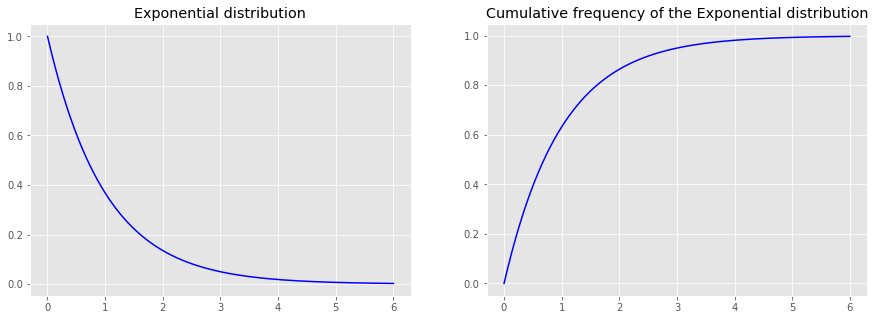

In [19]:
x = np.linspace(0, 6, 1000)  # x axis
dist = stats.expon()

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

ax1.plot(x, dist.pdf(x), color='b')
ax1.set_title('Exponential distribution')

ax2.plot(x, dist.cdf(x), color='b')
ax2.set_title('Cumulative frequency of the Exponential distribution')